In [1]:
from __future__ import annotations

import random

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
from deeptensor import Value, Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

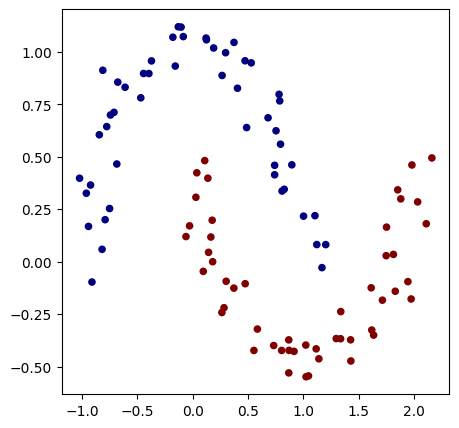

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(n_samples=100, noise=0.1)

y = y * 2 - 1  # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [5]:
# initialize a model
model = MLP(2, [16, 16, 1])  # 2-layer neural network

print(model)

print("number of parameters", len(model.parameters()))

MLP of [Layer(2,16), Layer(16,16), Layer(16,1), ]
number of parameters 337


In [6]:
# loss function
def my_loss_fn():
    scores = []
    for x in X:
        inp = [Value(x[0]), Value(x[1])]
        out = model(inp)
        scores.append(out)

    # svm "max-margin" loss
    losses = [(1 + (-yi * scorei[0])).relu() for yi, scorei in zip(y, scores)]

    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum(p * p for p in model.parameters())
    total_loss = data_loss + reg_loss

    # Also get accuracy
    accuracy = [(yi > 0) == (scorei[0].data > 0) for yi, scorei in zip(y, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

In [7]:
# optimization
for k in range(200):
    # forward
    total_loss, acc = my_loss_fn()

    # backward
    model.zero_grad()
    total_loss.backward()

    # update (sgd)
    learning_rate = 0.01
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.0149677744248524, accuracy 31.0%
step 1 loss 1.0146491536756554, accuracy 32.0%
step 2 loss 1.014328263417079, accuracy 32.0%
step 3 loss 1.014005036679022, accuracy 32.0%
step 4 loss 1.0136794047839923, accuracy 32.0%
step 5 loss 1.013351297284879, accuracy 34.0%
step 6 loss 1.013020641900118, accuracy 36.0%
step 7 loss 1.0126873644460734, accuracy 37.0%
step 8 loss 1.0123513887665345, accuracy 37.0%
step 9 loss 1.012012636659147, accuracy 41.0%
step 10 loss 1.0116710277986567, accuracy 43.0%
step 11 loss 1.011326479656768, accuracy 44.0%
step 12 loss 1.0109789074184616, accuracy 44.0%
step 13 loss 1.0106282238945783, accuracy 45.0%
step 14 loss 1.0102743394304783, accuracy 45.0%
step 15 loss 1.009917161810555, accuracy 45.0%
step 16 loss 1.0095565961583983, accuracy 49.0%
step 17 loss 1.0091925448323569, accuracy 54.0%
step 18 loss 1.0088249073162543, accuracy 56.99999999999999%
step 19 loss 1.008453580105006, accuracy 57.99999999999999%
step 20 loss 1.0080784565848284,

(-1.548639298268643, 1.951360701731357)

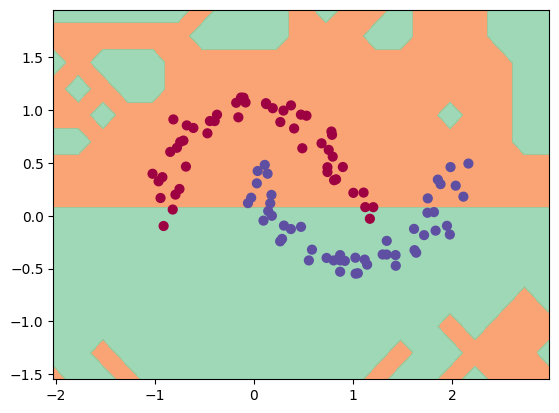

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s[0].data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
